In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    average_precision_score,
    f1_score
)

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# -----------------------------
# 📊 model_evaluation
# -----------------------------

In [21]:
# ✅ Functions for Plots
import os

# Create the directory if it doesn't exist
plot_dir = "/content/drive/MyDrive/FraudPulse/plots/"
os.makedirs(plot_dir, exist_ok=True)

def plot_confusion(y_true, y_pred, title, save_path):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.savefig(save_path)
    plt.show()

def plot_roc(y_true, y_scores, title, save_path):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.savefig(save_path)
    plt.show()

def plot_pr(y_true, y_scores, title, save_path):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = average_precision_score(y_true, y_scores)
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc="lower left")
    plt.savefig(save_path)
    plt.show()

# -----------------------------
# Credit Card - Logistic Regression
# -----------------------------

In [5]:
train = pd.read_csv("/content/drive/MyDrive/FraudPulse/data/processed/creditcard_train_ready.csv")
test = pd.read_csv("/content/drive/MyDrive/FraudPulse/data/processed/creditcard_test_ready.csv")


# Separate X and y
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (398040, 30), Test shape: (85443, 30)


In [8]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [11]:
print("\n🔹 Training Logistic Regression...")
lr.fit(X_train, y_train)

print("🔹 Training Random Forest...")
rf.fit(X_train, y_train)


🔹 Training Logistic Regression...
🔹 Training Random Forest...


RandomForestClassifier(random_state=42)

In [12]:
# Logistic Regression Predictions
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

print("\n✅ Logistic Regression Results")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("AUC-PR:", average_precision_score(y_test, y_prob_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))

# Random Forest Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("\n✅ Random Forest Results")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("AUC-PR:", average_precision_score(y_test, y_prob_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))


✅ Logistic Regression Results
Confusion Matrix:
[[83410  1885]
 [   18   130]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

ROC AUC: 0.967180437369194
AUC-PR: 0.7062135707831341
F1 Score: 0.12020342117429496

✅ Random Forest Results
Confusion Matrix:
[[85281    14]
 [   32   116]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.78      0.83       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC: 0.9689994027088815
AUC-PR: 0.8281333489231498
F1 Sc

In [13]:
# Load your actual predictions and true labels here
y_test_creditcard = y_test
y_pred_creditcard_logreg = y_pred_lr
y_scores_creditcard_logreg = y_prob_lr

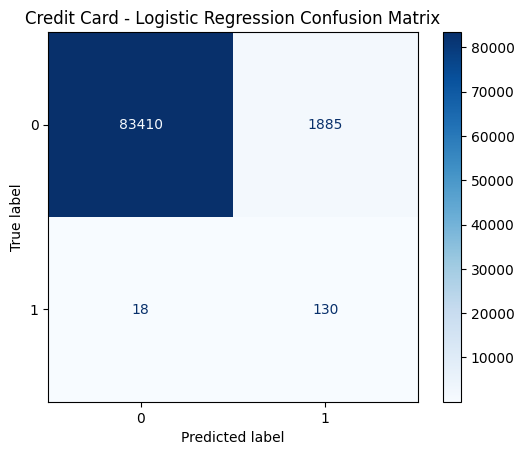

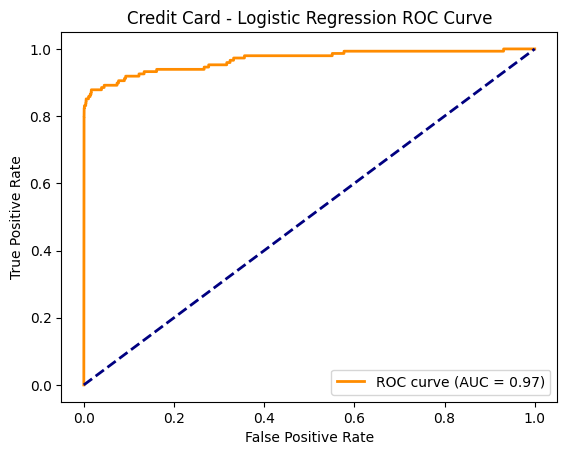

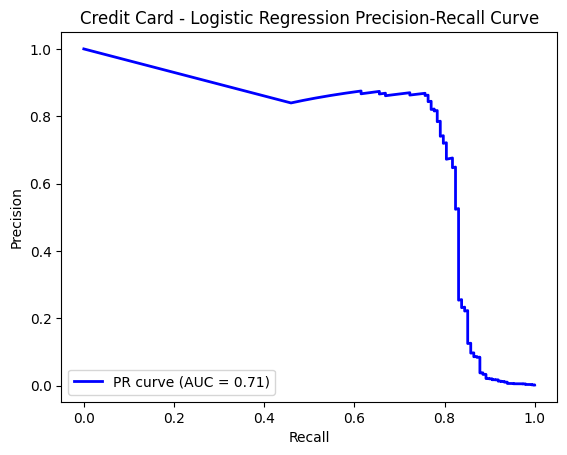

In [19]:
import os

# Create the directory if it doesn't exist
plot_dir = "/content/drive/MyDrive/FraudPulse/plots/"
os.makedirs(plot_dir, exist_ok=True)

plot_confusion(
    y_test_creditcard,
    y_pred_creditcard_logreg,
    "Credit Card - Logistic Regression Confusion Matrix",
    os.path.join(plot_dir, "creditcard_logreg_confusion.png")
)

plot_roc(
    y_test_creditcard,
    y_scores_creditcard_logreg,
    "Credit Card - Logistic Regression ROC Curve",
    os.path.join(plot_dir, "creditcard_logreg_roc.png")
)

plot_pr(
    y_test_creditcard,
    y_scores_creditcard_logreg,
    "Credit Card - Logistic Regression Precision-Recall Curve",
    os.path.join(plot_dir, "creditcard_logreg_pr.png")
)

# -----------------------------
# Credit Card - Random Forest
# -----------------------------

In [20]:
y_pred_creditcard_rf = y_pred_rf
y_scores_creditcard_rf = y_prob_rf

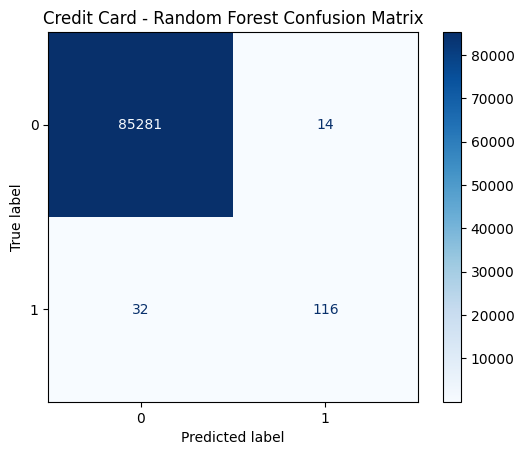

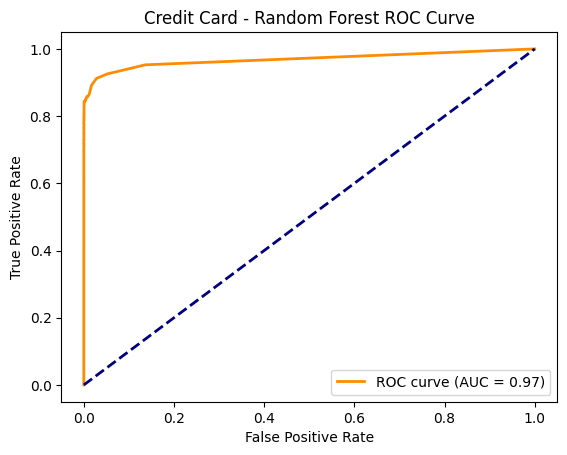

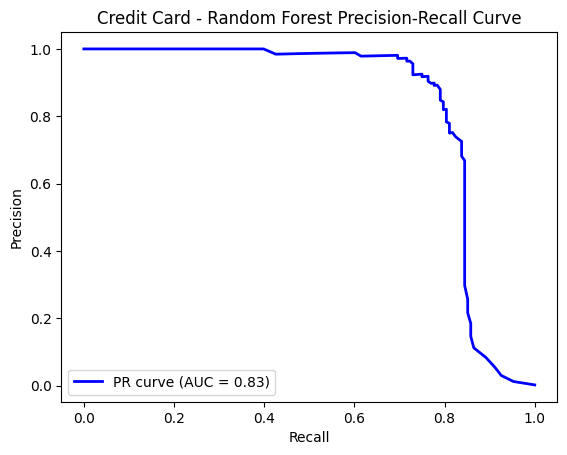

In [22]:
plot_confusion(
    y_test_creditcard,
    y_pred_creditcard_rf,
    "Credit Card - Random Forest Confusion Matrix",
    os.path.join(plot_dir, "creditcard_rf_confusion.png")
)

plot_roc(
    y_test_creditcard,
    y_scores_creditcard_rf,
    "Credit Card - Random Forest ROC Curve",
    os.path.join(plot_dir, "creditcard_rf_roc.png")
)

plot_pr(
    y_test_creditcard,
    y_scores_creditcard_rf,
    "Credit Card - Random Forest Precision-Recall Curve",
    os.path.join(plot_dir, "creditcard_rf_pr.png")
)

# -----------------------------
# Fraud_Data - Logistic Regression
# -----------------------------

In [23]:
train = pd.read_csv("/content/drive/MyDrive/FraudPulse/data/processed/train_ready.csv")
test = pd.read_csv("/content/drive/MyDrive/FraudPulse/data/processed/test_ready.csv")


# Separate X and y
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (191744, 18), Test shape: (45334, 18)


In [24]:
print("\n🔹 Training Logistic Regression...")
lr.fit(X_train, y_train)

print("🔹 Training Random Forest...")
rf.fit(X_train, y_train)


🔹 Training Logistic Regression...
🔹 Training Random Forest...


RandomForestClassifier(random_state=42)

In [25]:
# Logistic Regression Predictions
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

print("\n✅ Logistic Regression Results")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("AUC-PR:", average_precision_score(y_test, y_prob_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))

# Random Forest Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("\n✅ Random Forest Results")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("AUC-PR:", average_precision_score(y_test, y_prob_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))


✅ Logistic Regression Results
Confusion Matrix:
[[40983   106]
 [ 1957  2288]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41089
           1       0.96      0.54      0.69      4245

    accuracy                           0.95     45334
   macro avg       0.96      0.77      0.83     45334
weighted avg       0.95      0.95      0.95     45334

ROC AUC: 0.7723829862729246
AUC-PR: 0.6324285324217767
F1 Score: 0.6892604307877692

✅ Random Forest Results
Confusion Matrix:
[[39900  1189]
 [ 1908  2337]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     41089
           1       0.66      0.55      0.60      4245

    accuracy                           0.93     45334
   macro avg       0.81      0.76      0.78     45334
weighted avg       0.93      0.93      0.93     45334

ROC AUC: 0.7709955558850232
AUC-PR: 0.6281891957515888
F1 Sc

In [26]:
y_test_fraud = y_test
y_pred_fraud_logreg = y_pred_lr
y_scores_fraud_logreg = y_prob_lr

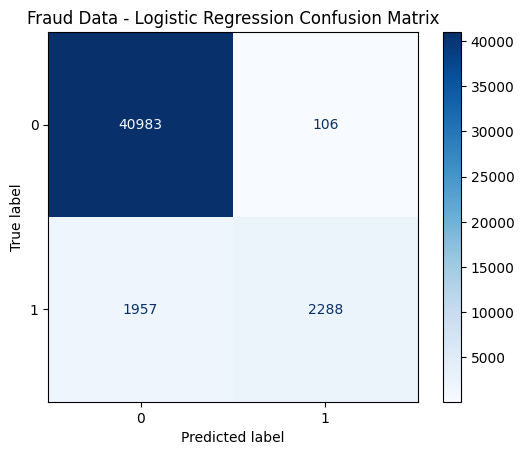

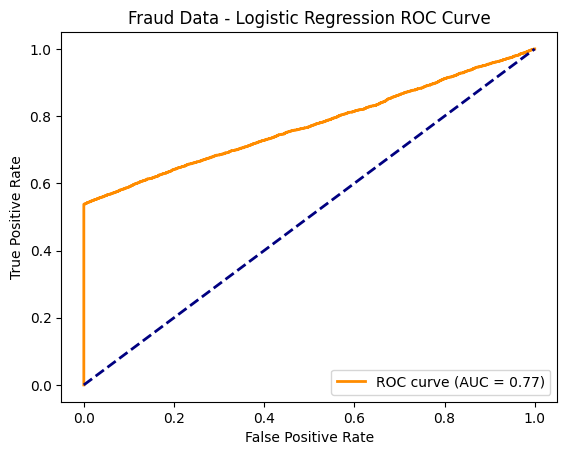

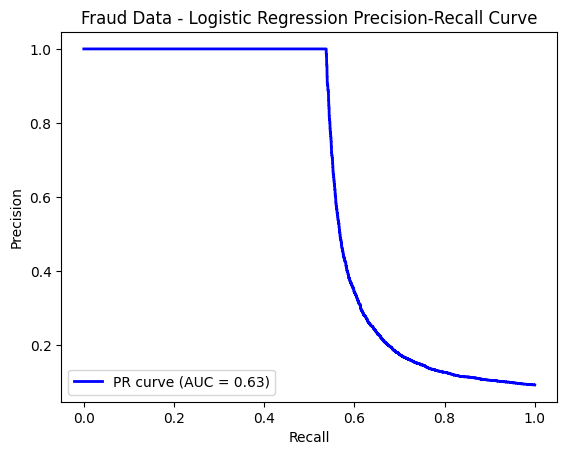

In [27]:
plot_confusion(
    y_test_fraud,
    y_pred_fraud_logreg,
    "Fraud Data - Logistic Regression Confusion Matrix",
    os.path.join(plot_dir, "fraud_logreg_confusion.png")
)

plot_roc(
    y_test_fraud,
    y_scores_fraud_logreg,
    "Fraud Data - Logistic Regression ROC Curve",
    os.path.join(plot_dir, "fraud_logreg_roc.png")
)

plot_pr(
    y_test_fraud,
    y_scores_fraud_logreg,
    "Fraud Data - Logistic Regression Precision-Recall Curve",
    os.path.join(plot_dir, "fraud_logreg_pr.png")
)

# -----------------------------
#  Fraud_Data - Random Forest
# -----------------------------


In [28]:
y_pred_fraud_rf = y_pred_rf
y_scores_fraud_rf = y_prob_rf

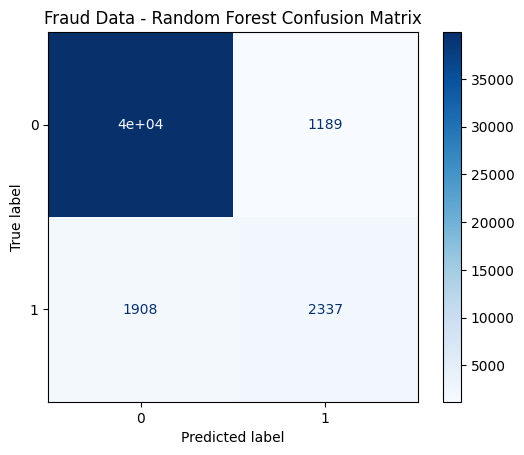

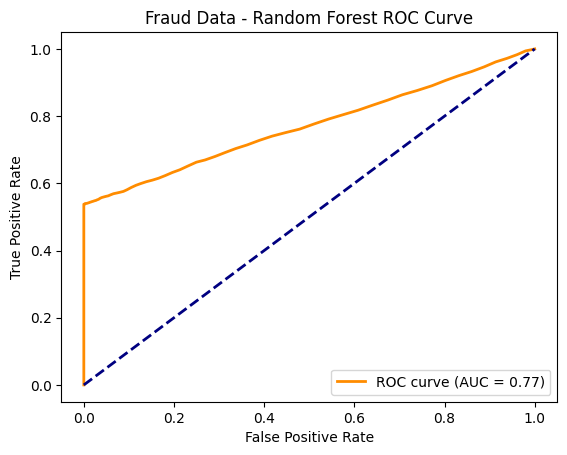

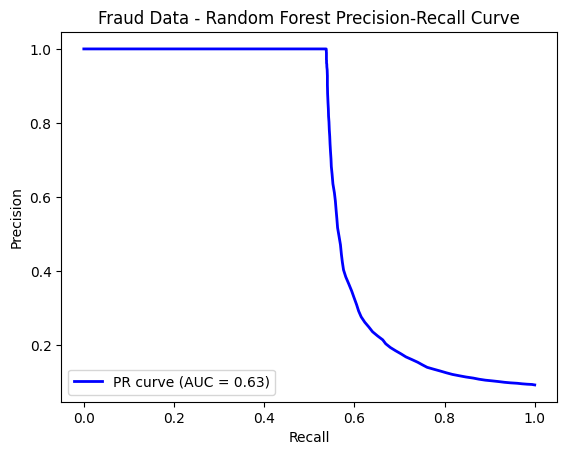

In [29]:
plot_confusion(
    y_test_fraud,
    y_pred_fraud_rf,
    "Fraud Data - Random Forest Confusion Matrix",
    os.path.join(plot_dir, "fraud_rf_confusion.png")
)

plot_roc(
    y_test_fraud,
    y_scores_fraud_rf,
    "Fraud Data - Random Forest ROC Curve",
    os.path.join(plot_dir, "fraud_rf_roc.png")
)

plot_pr(
    y_test_fraud,
    y_scores_fraud_rf,
    "Fraud Data - Random Forest Precision-Recall Curve",
    os.path.join(plot_dir, "fraud_rf_pr.png")
)